In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
## Matplotlib settings
## inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 200,  # to adjust notebook inline plot size
    'savefig.dpi': 200,  # to adjust notebook inline plot size
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.5, 2.625], # 4 x 3
#     'figure.figsize': [4*1.125, 3*1.125], # 4x3, full slide in keynote
    'font.family': 'serif',
    'figure.max_open_warning':100
}
mpl.rcParams.update(params)

## Get physical constants from Scipy
import scipy.constants as con
## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m
k = con.physical_constants['Boltzmann constant in eV/K'][0]

import scipy.integrate as int

import scipy.io as sio

import scipy.optimize as opt

import scipy.special as spl

In [3]:
misloc_pack_path = os.path.join(
    os.path.sep,
    'Users',
    'chair',
    'Documents',
    'Academia',
    'SuperRes',
    'Biteen_colab',
    'Mispolarization',
    'python',
#     'gitted',
    )

sys.path.append(misloc_pack_path)

import misloc_mispol_package as mmp
import misloc_mispol_package.calc.coupled_dipoles as cp
import misloc_mispol_package.optics.anal_foc_diff_fields as aff

In [4]:
import twosphere_temperature as tst
import pti_model as pti

In [5]:
a1 = 10
a2 = 15
eps_back = 1.473**2

# del_d = 4*a1

d = 3*a1
d_col_nm = np.array([[d, 0, 0]])*1e-7

hw = 2.2
sensorsize_nm = 1000

plot_hws = np.linspace(2.2, 2.7, 300)


# eps1 = -2.5676 + 1j*3.6391
n0 = eps_back
eps0 = n0**2

## pump power 600 micro watts = 600*1e-6 * 1e7 erg/s
# Eplane = (1.4444)**0.5 * 10**18 * 10**(-1)
Eplane = ((8*np.pi/c)*600*1e-6*1e7)**0.5

In [6]:
## Assign materialk porperties
au_eps_inf=9.82335326  # eps_inf
au_w_p=9.06705560/hbar  # w_p
au_gamma=0.0334860149/hbar  # gamma

In [7]:
def alpha_1_of_hw(hw):
    return cp.sparse_ret_sphere_polarizability_Drude(
        w=hw/hbar, 
#         eps_inf=14.2, 
#         w_p=10.0/hbar, 
#         gamma=0.20/hbar,
#         eps_b=1.33**2., 
        a=a1*1e-7, 
        eps_inf=au_eps_inf,  # eps_inf
        w_p=au_w_p,  # w_p
        gamma=au_gamma,  # gamma
        eps_b=eps_back,  # eps_b
#         a=41*1e-7
        )

def alpha_2_of_hw(hw):
    return cp.sparse_ret_sphere_polarizability_Drude(
        w=hw/hbar, 
        eps_inf=au_eps_inf,  # eps_inf
        w_p=au_w_p,  # w_p
        gamma=au_gamma,  # gamma
        eps_b=eps_back,  # eps_b
        a=a2*1e-7, 
        )

In [8]:

coupled_absorption = cp.sigma_abs_coupled(
    mol_angle=0,
    plas_angle=0,
    d_col = d_col_nm,
    E_d_angle=None,
    drive_hbar_w=plot_hws,
    alpha0_diag=alpha_1_of_hw(plot_hws),
    alpha1_diag=alpha_2_of_hw(plot_hws),
    n_b=eps_back**0.5,
    drive_amp=Eplane,)

sphere_1_absorption = cp.single_dip_absorption(
    mol_angle=0,
    E_d_angle=0,
    alpha_0_p0=alpha_1_of_hw(plot_hws),
    drive_hbar_w=plot_hws,
    drive_amp=Eplane,
    n_b=eps_back**0.5,)

sphere_2_absorption = cp.single_dip_absorption(
    mol_angle=0,
    E_d_angle=0,
    alpha_0_p0=alpha_2_of_hw(plot_hws),
    drive_hbar_w=plot_hws,
    drive_amp=Eplane,
    n_b=eps_back**0.5,)

Text(0, 0.5, '$\\sigma$ [$\\mathrm{cm}^2$]')

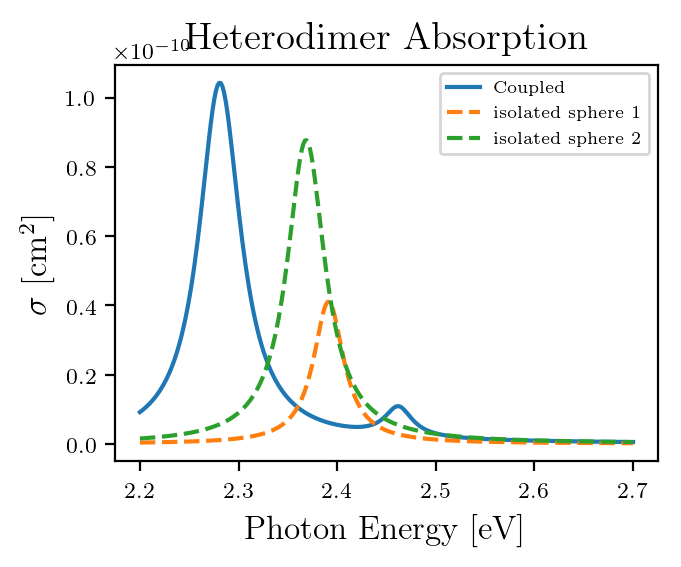

In [9]:
plt.plot(plot_hws, coupled_absorption[0], label='Coupled')
# plt.plot(plot_hws, coupled_scattering[1][2], label='sphere 1 component')
# plt.plot(plot_hws, coupled_scattering[1][2], label='sphere 1 component')

plt.plot(plot_hws, sphere_1_absorption, ls='--', label='isolated sphere 1')
plt.plot(plot_hws, sphere_2_absorption, ls='--', label='isolated sphere 2')
plt.legend(fontsize=6)
plt.title("Heterodimer Absorption")
plt.xlabel('Photon Energy [eV]')
plt.ylabel(r'$\sigma$ [$\mathrm{cm}^2$]')

Plot dipole components of power absorbed

Text(0, 0.5, '$\\sigma$ [$\\mathrm{cm}^2$]')

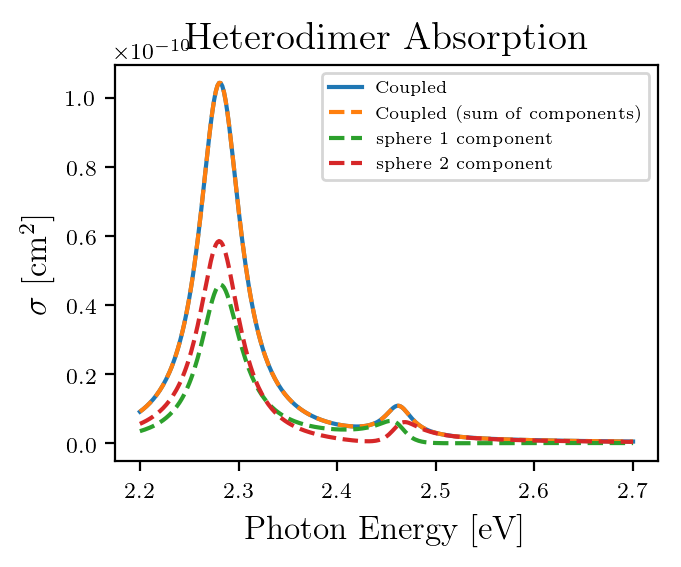

In [10]:
plt.plot(plot_hws, coupled_absorption[0], label='Coupled')
plt.plot(
    plot_hws, 
    coupled_absorption[1][0]-coupled_absorption[1][1]+coupled_absorption[1][2]-coupled_absorption[1][3], 
    ls='--',
    label='Coupled (sum of components)')
# plt.plot(plot_hws, coupled_scattering[1][2], label='sphere 1 component')
# plt.plot(plot_hws, coupled_scattering[1][2], label='sphere 1 component')

plt.plot(
    plot_hws, 
    coupled_absorption[1][0]-coupled_absorption[1][1], 
    ls='--', 
    label='sphere 1 component')
plt.plot(
    plot_hws, 
    coupled_absorption[1][2]-coupled_absorption[1][3], 
    ls='--', 
    label='sphere 2 component')
plt.legend(fontsize=6)
plt.title("Heterodimer Absorption")
plt.xlabel('Photon Energy [eV]')
plt.ylabel(r'$\sigma$ [$\mathrm{cm}^2$]')

which supports what I would have expected, that the larger sphere is dominating absorption at the low energy mode

In [11]:
test_hw = 2.29
obs_points = np.linspace(-sensorsize_nm/2, sensorsize_nm/2, 100)*1e-7

p1_test, p2_test = cp.coupled_dip_mags_focused_beam(
    mol_angle=0,
    plas_angle=0,
    d_col = -d_col_nm,
    p0_position=-d_col_nm/2,
    beam_x_positions=obs_points,
    E_d_angle=0,
    drive_hbar_w=test_hw,
    alpha0_diag=alpha_1_of_hw(test_hw),
    alpha1_diag=alpha_2_of_hw(test_hw),
    n_b=eps_back**0.5,
    drive_amp=Eplane,
    return_polarizabilities=False,
    )


In [12]:
pow_abs_1_test = cp.power_absorped(
    p1_test, 
    alpha_1_of_hw(test_hw),
    test_hw,
    n_b=eps_back**0.5)

pow_abs_2_test = cp.power_absorped(
    p2_test, 
    alpha_2_of_hw(test_hw),
    test_hw,
    n_b=eps_back**0.5)

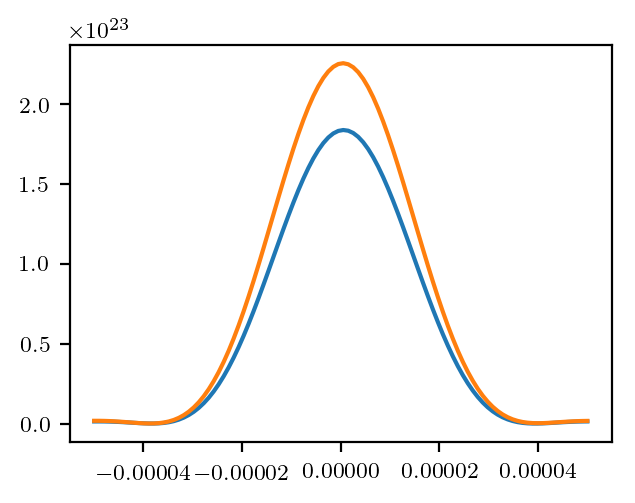

In [13]:
plt.plot(obs_points, pow_abs_1_test)
plt.plot(obs_points, pow_abs_2_test)